In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

data_path='/home/franknitty/irs_nyc_migration/data'
#data_path='/Users/anastasiaclark/irs_nyc_migration/data'
nyc=['36005','36047','36061','36081','36085']
nymet=['35620']
cities=['06037','17031','48201','04013','42101','48029','06073','48113','06085']
metros=['35620','31080','16980','19100','26420','47900','37980','33100','12060','14460','41860','38060','40140','19820']

years=['2011','2012','2013','2014','2015', '2016']

metro_pep=pd.read_csv(os.path.join(data_path, 'census_pop_est','cbsa-est2016-modified.csv'),converters={'CBSA':str})
county_pep=pd.read_csv(os.path.join(data_path, 'census_pop_est','co-est2016-alldata.csv'), converters={'STATE':str,'COUNTY':str},encoding='LATIN-1')

In [8]:
metro_pep.set_index('CBSA', inplace=True)
metro_pep.head()

,NAME,LSAD,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,...,NETMIG2014,NETMIG2015,NETMIG2016,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016
CBSA,,,,,,,,,,,,,,,,,,,,,
10100,"Aberdeen, SD",Micropolitan Statistical Area,40602,40602,40723,41038,41624,42290,42450,42708,...,48,148,253,1,-12,11,-16,-3,-20,-23
10140,"Aberdeen, WA",Micropolitan Statistical Area,72797,72804,72863,72349,71746,70989,70779,71023,...,-106,256,661,-1,-8,6,-52,-48,42,12
10180,"Abilene, TX",Metropolitan Statistical Area,165252,165252,165603,166651,167540,167609,168465,169893,...,120,733,-218,0,24,2,54,-51,-13,-1
10220,"Ada, OK",Micropolitan Statistical Area,37492,37492,37602,37714,38039,38165,38263,38268,...,-42,-50,76,-3,-12,1,15,-25,23,-19
10300,"Adrian, MI",Micropolitan Statistical Area,99892,99892,99635,99302,98994,98784,98696,98389,...,-141,-385,139,21,-45,11,-4,-33,44,-76


In [9]:
# county pep needs unique FIPS
county_pep.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,40,3,6,01,000,Alabama,Alabama,4779736,4780131,4785492,...,0.335703,0.086842,-0.642255,-0.177829,0.709411,1.062617,1.202226,1.065267,0.411670,0.797351
1,50,3,6,01,001,Alabama,Autauga County,54571,54571,54742,...,-4.607582,2.149969,-2.799695,4.128528,6.163804,-5.295515,-4.571158,2.259290,-2.654256,4.255281
2,50,3,6,01,003,Alabama,Baldwin County,182265,182265,183199,...,21.672935,19.038117,17.311339,19.628723,15.757654,18.612620,22.757100,20.248574,18.585398,20.807611
3,50,3,6,01,005,Alabama,Barbour County,27457,27457,27348,...,-7.027927,-4.208488,-16.593442,-9.495549,-1.280316,-7.418561,-7.360829,-4.506434,-16.819716,-9.686991
4,50,3,6,01,007,Alabama,Bibb County,22915,22919,22861,...,-6.556506,0.088865,0.088747,1.504292,-4.956466,-4.318988,-5.980596,0.888652,0.887469,2.300681


In [10]:
county_pep['fips']=county_pep.STATE+county_pep.COUNTY
county_pep.set_index('fips',inplace=True)

In [11]:
# most columns are the same in county and metro pep dataset
# however, one column, NPOPCNHG has an underscore in county pep
# remove the udnderscore to make columns of interest be same in both datasets
col_names=[c.replace('_','') for c in county_pep.columns]
county_pep.columns=col_names

In [12]:
# for each period year, plot distributions of the rates for natural increase, net domestic migration and net international migration
# and print 10 top counties with the highest domestic migration rate
for year in years:
    county_pep[['RNATURALINC{}'.format(year),'RDOMESTICMIG{}'.format(year),'RINTERNATIONALMIG{}'.format(year)]].hist(color='k', alpha=0.5, figsize=(12,8), bins=100,sharey=True)
    plt.show()
    print county_pep[['CTYNAME','STNAME','REGION','DIVISION','RDOMESTICMIG{}'.format(year)]].sort_values('RDOMESTICMIG{}'.format(year),ascending=False).head(n=10)

SyntaxError: invalid syntax (<ipython-input-12-fc22c80f17d8>, line 6)

In [13]:
def rate_heat_map(rate_col,by_area,title):
    
    '''create a heat map of counties groupoed by
    passed area and fr the passed rate over the years'''
    
    divisions={1 : 'New England', 
            2 : 'Middle Atlantic', 
            3 : 'East North Central',
            4 : 'West North Central', 
            5 : 'South Atlantic', 
            6 : 'East South Central', 
            7 : 'West South Central', 
            8 : 'Mountain', 
            9 : 'Pacific'}     


    regions={1 :'Northeast', 
            2 : 'Midwest', 
            3 : 'South',  
            4 : 'West' }

    cols=county_pep.columns[(county_pep.columns.str.contains(rate_col))|(county_pep.columns.str.contains(by_area))]
    grouped=county_pep[cols].groupby(by_area).mean()
    # get the year on as the column name
    grouped.columns=[c[-4:] for c in grouped.columns]
    
    if by_area=='DIVISION':
        df=pd.Series(divisions).to_frame().rename(columns={0:'division'})
    elif by_area=='REGION':
        df=pd.Series(regions).to_frame().rename(columns={0:'regions'})
        
    grouped=grouped.merge(df, left_index=True, right_index=True).set_index(df.columns[0])
    sns.plt.title(title)
    sns.heatmap(grouped) 

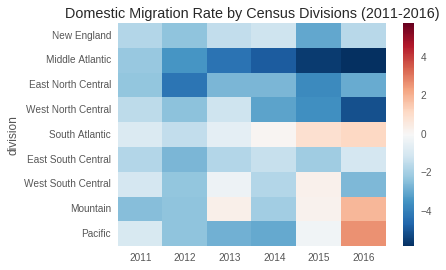

In [14]:
rate_heat_map('RDOMESTICMIG','DIVISION','Domestic Migration Rate by Census Divisions (2011-2016)')
# counties in the South Atlantic, Mountain and Pasific regions are getting higher domestic migration rates (on average)
# in the recent years while Middle Atlantic region is increasingly losing more domestic migrants then it is receiving 

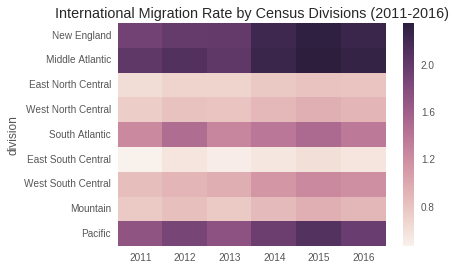

In [15]:
rate_heat_map('RINTERNATIONALMIG','DIVISION','International Migration Rate by Census Divisions (2011-2016)')

In [16]:
# create lists of columns that will be used in analysis
pop_change=[c for c in county_pep.columns if c.startswith('NPOPCHG')]
nat_inc=[c for c in county_pep.columns if c.startswith('NATURALINC')]
net_int=[c for c in county_pep.columns if c.startswith('INTERNATIONALMIG')]
net_dom=[c for c in county_pep.columns if c.startswith('DOMESTICMIG')]
keep_cols=pop_change+nat_inc+net_int+net_dom

In [17]:
# Create keeper list of counties, fold April-July change into the change between 2010 and 2011

all_counties=county_pep[keep_cols].copy()

all_counties['NPOPCHG2011']=all_counties['NPOPCHG2011']+all_counties['NPOPCHG2010']
all_counties['NATURALINC2011']=all_counties['NATURALINC2011']+all_counties['NATURALINC2010']
all_counties['INTERNATIONALMIG2011']=all_counties['INTERNATIONALMIG2011']+all_counties['INTERNATIONALMIG2010']
all_counties['DOMESTICMIG2011']=all_counties['DOMESTICMIG2011']+all_counties['DOMESTICMIG2010']
all_counties.drop(['NPOPCHG2010','NATURALINC2010','INTERNATIONALMIG2010','DOMESTICMIG2010'],
                  axis=1,inplace=True)

In [18]:
#Create subset of NYC counties
nyc_est=all_counties.loc[nyc]
nyc_est

,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,...,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016
fips,,,,,,,,,,,,,,,,,,,,,
36005,14883,14784,11776,11137,11509,6524,16468,12789,12132,12128,...,14813,16643,17308,17198,-21175,-13389,-14171,-18051,-16181,-20956
36047,38961,28615,23062,17200,12397,4209,32691,26419,26484,25921,...,20244,22383,23318,22955,-21199,-17858,-21175,-32526,-33042,-43264
36061,23659,15588,5332,4015,6700,2566,12363,9965,9118,8447,...,15122,16715,17422,17217,-6062,-9030,-16750,-22309,-16103,-21557
36081,29211,18268,19574,16551,13079,5826,21169,16297,16423,16271,...,23229,25699,26697,26295,-21716,-21324,-17387,-26537,-25746,-35335
36085,2422,-174,1537,627,827,2046,2961,2213,1724,1835,...,1187,1314,1394,1356,-1900,-3684,-1139,-2324,-1824,-299


In [19]:
# Create keeper list of metros, fold April-July change into the change between 2010 and 2011

all_metros=metro_pep[keep_cols].copy()

all_metros['NPOPCHG2011']=all_metros['NPOPCHG2011']+all_metros['NPOPCHG2010']
all_metros['NATURALINC2011']=all_metros['NATURALINC2011']+all_metros['NATURALINC2010']
all_metros['INTERNATIONALMIG2011']=all_metros['INTERNATIONALMIG2011']+all_metros['INTERNATIONALMIG2010']
all_metros['DOMESTICMIG2011']=all_metros['DOMESTICMIG2011']+all_metros['DOMESTICMIG2010']
all_metros.drop(['NPOPCHG2010','NATURALINC2010','INTERNATIONALMIG2010','DOMESTICMIG2010'], axis=1, inplace=True)

In [20]:
#create subset for NY Metro
ny_metro=all_metros[metro_pep.NAME.str.contains('New York')].copy()
ny_metro

,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,...,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016
CBSA,,,,,,,,,,,,,,,,,,,,,
35620,184705,113258,104411,83389,65829,35571,145847,113773,106624,108950,...,126294,139938,145777,143731,-123396,-128006,-115765,-168503,-166950,-199996


In [21]:
# sum counties records to represent a single NYC record
city=nyc_est.sum(axis=0)

In [22]:
# function to reshape the data: make a row for each year of data
def reshape_dataset(df):
    # list to hold temporary dfs while reshaping
    dfs=[]
    for year in years:
        ixs=[i for i in df.index if year in i]
        yr=df.loc[ixs].reset_index().T
        yr.columns=yr.iloc[0]
        yr.drop(yr.index[0], inplace=True)
        yr.index=[year]
        # strip the year out of the column
        new_names=[n[0:len(n)-4].strip('_') for n in yr.columns]
        # assign new column names for a single year row
        yr.columns=new_names
        # append single year of data to the list 
        dfs.append(yr)
    # concatenate all the years
    reshaped=pd.concat(dfs)
    return reshaped

# function to plot the dataset as stacked bar chart
def plot_pop_change(df, title):
    leg_names=['Population Change','Net Domestic Migration','Net International Migration','Natural Increase']
    ax=df[['DOMESTICMIG','INTERNATIONALMIG','NATURALINC']].plot(kind='bar',stacked=True, figsize=(8,5),legend=False,alpha=0.8,color=['#FFB834','#A0CCCF','#006944'])
    df['NPOPCHG'].plot(ax=ax, linestyle=':', color='black', linewidth=3, legend=True)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    lgd=plt.legend(leg_names, loc=8,bbox_to_anchor=(0.5, -0.2), ncol=4,prop = {'size':12.5},frameon=False)
    ax.set_title(title)
    plt.show()

In [23]:
# reshape the data for NYC
df1=reshape_dataset(city) 
df1

,NPOPCHG,NATURALINC,INTERNATIONALMIG,DOMESTICMIG
2011,109136,85652,94899,-72052
2012,77081,67683,76138,-65285
2013,61281,65881,74595,-70622
2014,49530,64602,82754,-101747
2015,44512,60631,86139,-92896
2016,21171,57494,85021,-121411


In [24]:
df1.NPOPCHG.sum()
# table NYC2017a shows 362540 -in my summary at the bottom, if I subtract total 2016 estimates from 2010 Census I get 362540
# But when we sum the NPOPCHG columns for each year we get a slightly bigger number
# NYC2017a has footnote that says sums may not match totals due to small adjustments

362711

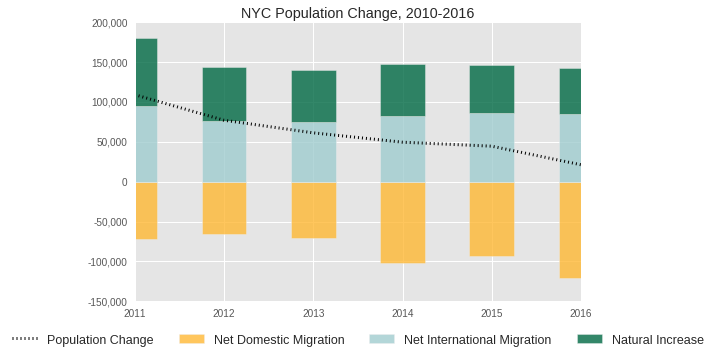

In [25]:
plot_pop_change(df1, 'NYC Population Change, 2010-2016')  

In [26]:
# reshape the data for New York metro
df2=reshape_dataset(ny_metro.T) 
df2

,NPOPCHG,NATURALINC,INTERNATIONALMIG,DOMESTICMIG
2011,184705,145847,163690,-123396
2012,113258,113773,129274,-128006
2013,104411,106624,126294,-115765
2014,83389,108950,139938,-168503
2015,65829,101803,145777,-166950
2016,35571,94720,143731,-199996


In [27]:
# Similar discrepancy here. Summing NPOPCHG yields 587,163. But subtracting total 2016 estimate from 2010 Census
# in table at bottom yields 586,224

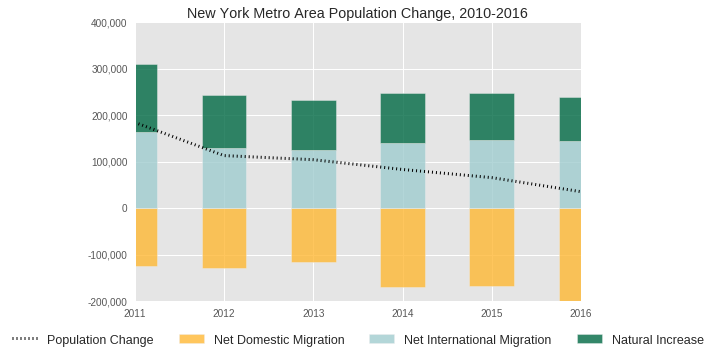

In [28]:
plot_pop_change(df2, 'New York Metro Area Population Change, 2010-2016') 

In [29]:
#Million lines of code to create summary table
nyc_popsummary=county_pep.loc[nyc][['CENSUS2010POP','POPESTIMATE2016']]
nyc_popsummary['label']='New York City'
nyc_popsummary=nyc_popsummary.groupby(['label']).sum().reset_index()
nyc_popsummary['change']=(nyc_popsummary.POPESTIMATE2016 - nyc_popsummary.CENSUS2010POP)
nyc_popsummary['pct_change']=((nyc_popsummary.change / nyc_popsummary.CENSUS2010POP) *100).round(1)
nyc_popsummary.set_index(['label'],inplace=True)

nymet_popsummary=metro_pep.loc[nymet][['CENSUS2010POP','POPESTIMATE2016']]
nymet_popsummary['label']='New York Metro Area'
nymet_popsummary.set_index(['label'],inplace=True)
nymet_popsummary['change']=(nymet_popsummary.POPESTIMATE2016 - nymet_popsummary.CENSUS2010POP)
nymet_popsummary['pct_change']=((nymet_popsummary.change / nymet_popsummary.CENSUS2010POP) *100).round(1)
nymet_popsummary.head()

table1=nyc_popsummary.append(nymet_popsummary)
table1.head()

,CENSUS2010POP,POPESTIMATE2016,change,pct_change
label,,,,
New York City,8175133,8537673,362540,4.4
New York Metro Area,19567410,20153634,586224,3.0


In [30]:
print(table1.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  CENSUS2010POP &  POPESTIMATE2016 &  change &  pct\_change \\
label               &                &                  &         &             \\
\midrule
New York City       &        8175133 &          8537673 &  362540 &         4.4 \\
New York Metro Area &       19567410 &         20153634 &  586224 &         3.0 \\
\bottomrule
\end{tabular}



In [31]:
#Create component summary table for NYC
table2nyc=df1.transpose()[['2012','2016']].rename(columns={'2012': 'yr2012', '2016': 'yr2016'}).sort_index()
table2nyc['pct_dif']=(((table2nyc.yr2016-table2nyc.yr2012) / table2nyc.yr2012) *100).astype(float).round(1)
table2nyc

,yr2012,yr2016,pct_dif
DOMESTICMIG,-65285,-121411,86.0
INTERNATIONALMIG,76138,85021,11.7
NATURALINC,67683,57494,-15.1
NPOPCHG,77081,21171,-72.5


In [32]:
#Create component summary table for NY Metro
table2nymet=df2.transpose()[['2012','2016']].rename(columns={'2012': 'yr2012', '2016': 'yr2016'}).sort_index()
table2nymet['pct_dif']=(((table2nymet.yr2016-table2nymet.yr2012) / table2nymet.yr2012) *100).astype(float).round(1)
table2nymet

,yr2012,yr2016,pct_dif
DOMESTICMIG,-128006,-199996,56.2
INTERNATIONALMIG,129274,143731,11.2
NATURALINC,113773,94720,-16.7
NPOPCHG,113258,35571,-68.6


In [33]:
#Join the two component tables together
table2=pd.merge(table2nyc, table2nymet, left_index=True, right_index=True)
table2 

,yr2012_x,yr2016_x,pct_dif_x,yr2012_y,yr2016_y,pct_dif_y
DOMESTICMIG,-65285,-121411,86.0,-128006,-199996,56.2
INTERNATIONALMIG,76138,85021,11.7,129274,143731,11.2
NATURALINC,67683,57494,-15.1,113773,94720,-16.7
NPOPCHG,77081,21171,-72.5,113258,35571,-68.6


In [34]:
print(table2.to_latex())

\begin{tabular}{lllrllr}
\toprule
{} & yr2012\_x & yr2016\_x &  pct\_dif\_x & yr2012\_y & yr2016\_y &  pct\_dif\_y \\
\midrule
DOMESTICMIG      &   -65285 &  -121411 &       86.0 &  -128006 &  -199996 &       56.2 \\
INTERNATIONALMIG &    76138 &    85021 &       11.7 &   129274 &   143731 &       11.2 \\
NATURALINC       &    67683 &    57494 &      -15.1 &   113773 &    94720 &      -16.7 \\
NPOPCHG          &    77081 &    21171 &      -72.5 &   113258 &    35571 &      -68.6 \\
\bottomrule
\end{tabular}



In [35]:
#Create DF for the 14 biggest metro areas
big_metros=all_metros.loc[metros]
big_metros.head()

,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,...,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016
CBSA,,,,,,,,,,,,,,,,,,,,,
35620,184705,113258,104411,83389,65829,35571,145847,113773,106624,108950,...,126294,139938,145777,143731,-123396,-128006,-115765,-168503,-166950,-199996
31080,113399,96130,89522,73041,67775,41619,117947,91197,89421,90945,...,45829,52712,55430,54354,-63636,-38500,-44834,-66183,-72260,-87577
16980,32312,22693,19406,7932,-11324,-19570,72904,54843,50337,51439,...,21964,25026,26747,25898,-66759,-53840,-50636,-68045,-80340,-89547
19100,145335,132504,108975,132219,144614,143435,73344,57556,56264,57438,...,20982,24416,25907,25626,45783,55505,32868,49286,60796,60230
26420,136913,123405,143350,163879,159419,125005,73189,57805,57282,60913,...,29460,33556,35344,35000,30536,38656,55763,68520,61674,28090


In [36]:
#Create summary for all 6 years
big_metros['domestic']=(big_metros.DOMESTICMIG2011 + big_metros.DOMESTICMIG2012 + big_metros.DOMESTICMIG2013 + big_metros.DOMESTICMIG2014
                       + big_metros.DOMESTICMIG2015 + big_metros.DOMESTICMIG2016)
big_metros['international']=(big_metros.INTERNATIONALMIG2011 + big_metros.INTERNATIONALMIG2012 + big_metros.INTERNATIONALMIG2013 
                             + big_metros.INTERNATIONALMIG2014 + big_metros.INTERNATIONALMIG2015 + big_metros.INTERNATIONALMIG2016)
big_metros['natural']=(big_metros.NATURALINC2011 + big_metros.NATURALINC2012 + big_metros.NATURALINC2013 + big_metros.NATURALINC2014
                       + big_metros.NATURALINC2015 + big_metros.NATURALINC2016)

metro_sum=pd.DataFrame(big_metros,columns=['domestic','international','natural'])
metro_sum

,domestic,international,natural
CBSA,,,
35620,-902616,848704,671717
31080,-372990,315879,554435
16980,-409167,148505,321530
19100,304468,140476,357825
26420,283239,193618,372983
47900,-46264,245540,297395
37980,-127868,123139,115420
33100,-6762,381468,120947
12060,153366,104223,241489


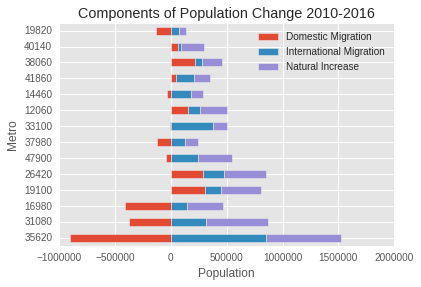

In [37]:
my_plot = metro_sum.plot(kind='barh', stacked=True, title="Components of Population Change 2010-2016",rot=0)
my_plot.set_xlabel("Population")
my_plot.set_ylabel("Metro")
my_plot.legend(["Domestic Migration","International Migration", "Natural Increase"], loc=1,ncol=1)


In [38]:
#TODO: replace codes with labels, reconsider colors, spot check values to make sure they are correct
#TODO create an accompanying table showing % net pop growth? Or compute and add as label to the right of each bar?
#TODO county-level version of this will be more complicated as 5 NYC counties must be aggregated